In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/log-history-16-1/log_history.csv
/kaggle/input/history-log-13-1/log_history_13_1.csv


In [2]:
df = pd.read_csv("/kaggle/input/log-history-16-1/log_history.csv")

In [3]:
df

,loss,learning_rate,epoch,step,eval_loss,eval_map@3,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,1.6136,0.000003,0.02,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.02,25,1.609221,0.485000,0.335,40.5203,4.936,1.234,NaN,NaN,NaN,NaN,NaN
2,1.6116,0.000007,0.04,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.04,50,1.606294,0.725000,0.610,40.2497,4.969,1.242,NaN,NaN,NaN,NaN,NaN
4,1.4598,0.000010,0.05,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.6936,0.000002,0.84,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,0.84,1200,0.575817,0.868333,0.785,40.5437,4.933,1.233,NaN,NaN,NaN,NaN,NaN
96,0.6239,0.000001,0.86,1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,0.86,1225,0.574785,0.870000,0.785,39.6680,5.042,1.260,NaN,NaN,NaN,NaN,NaN


In [4]:
train_loss = df.loss.values
learning_rate = df.learning_rate.values
epoch = df.epoch.values
step = df.step.values
eval_loss = df.eval_loss.values
eval_map = df['eval_map@3'].values
eval_accuracy = df.eval_accuracy.values

In [5]:
nan_train_loss = np.isnan(train_loss)
train_loss = train_loss[~nan_train_loss]

In [6]:
nan_learning_rate = np.isnan(learning_rate)
learning_rate = learning_rate[~nan_learning_rate]

In [7]:
nan_eval_loss = np.isnan(eval_loss)
eval_loss = eval_loss[~nan_eval_loss]

In [8]:
nan_eval_map = np.isnan(eval_map)
eval_map = eval_map[~nan_eval_map]

In [9]:
nan_eval_accuracy = np.isnan(eval_accuracy)
eval_accuracy = eval_accuracy[~nan_eval_accuracy]

In [10]:
steps = list(range(25,1226,25))

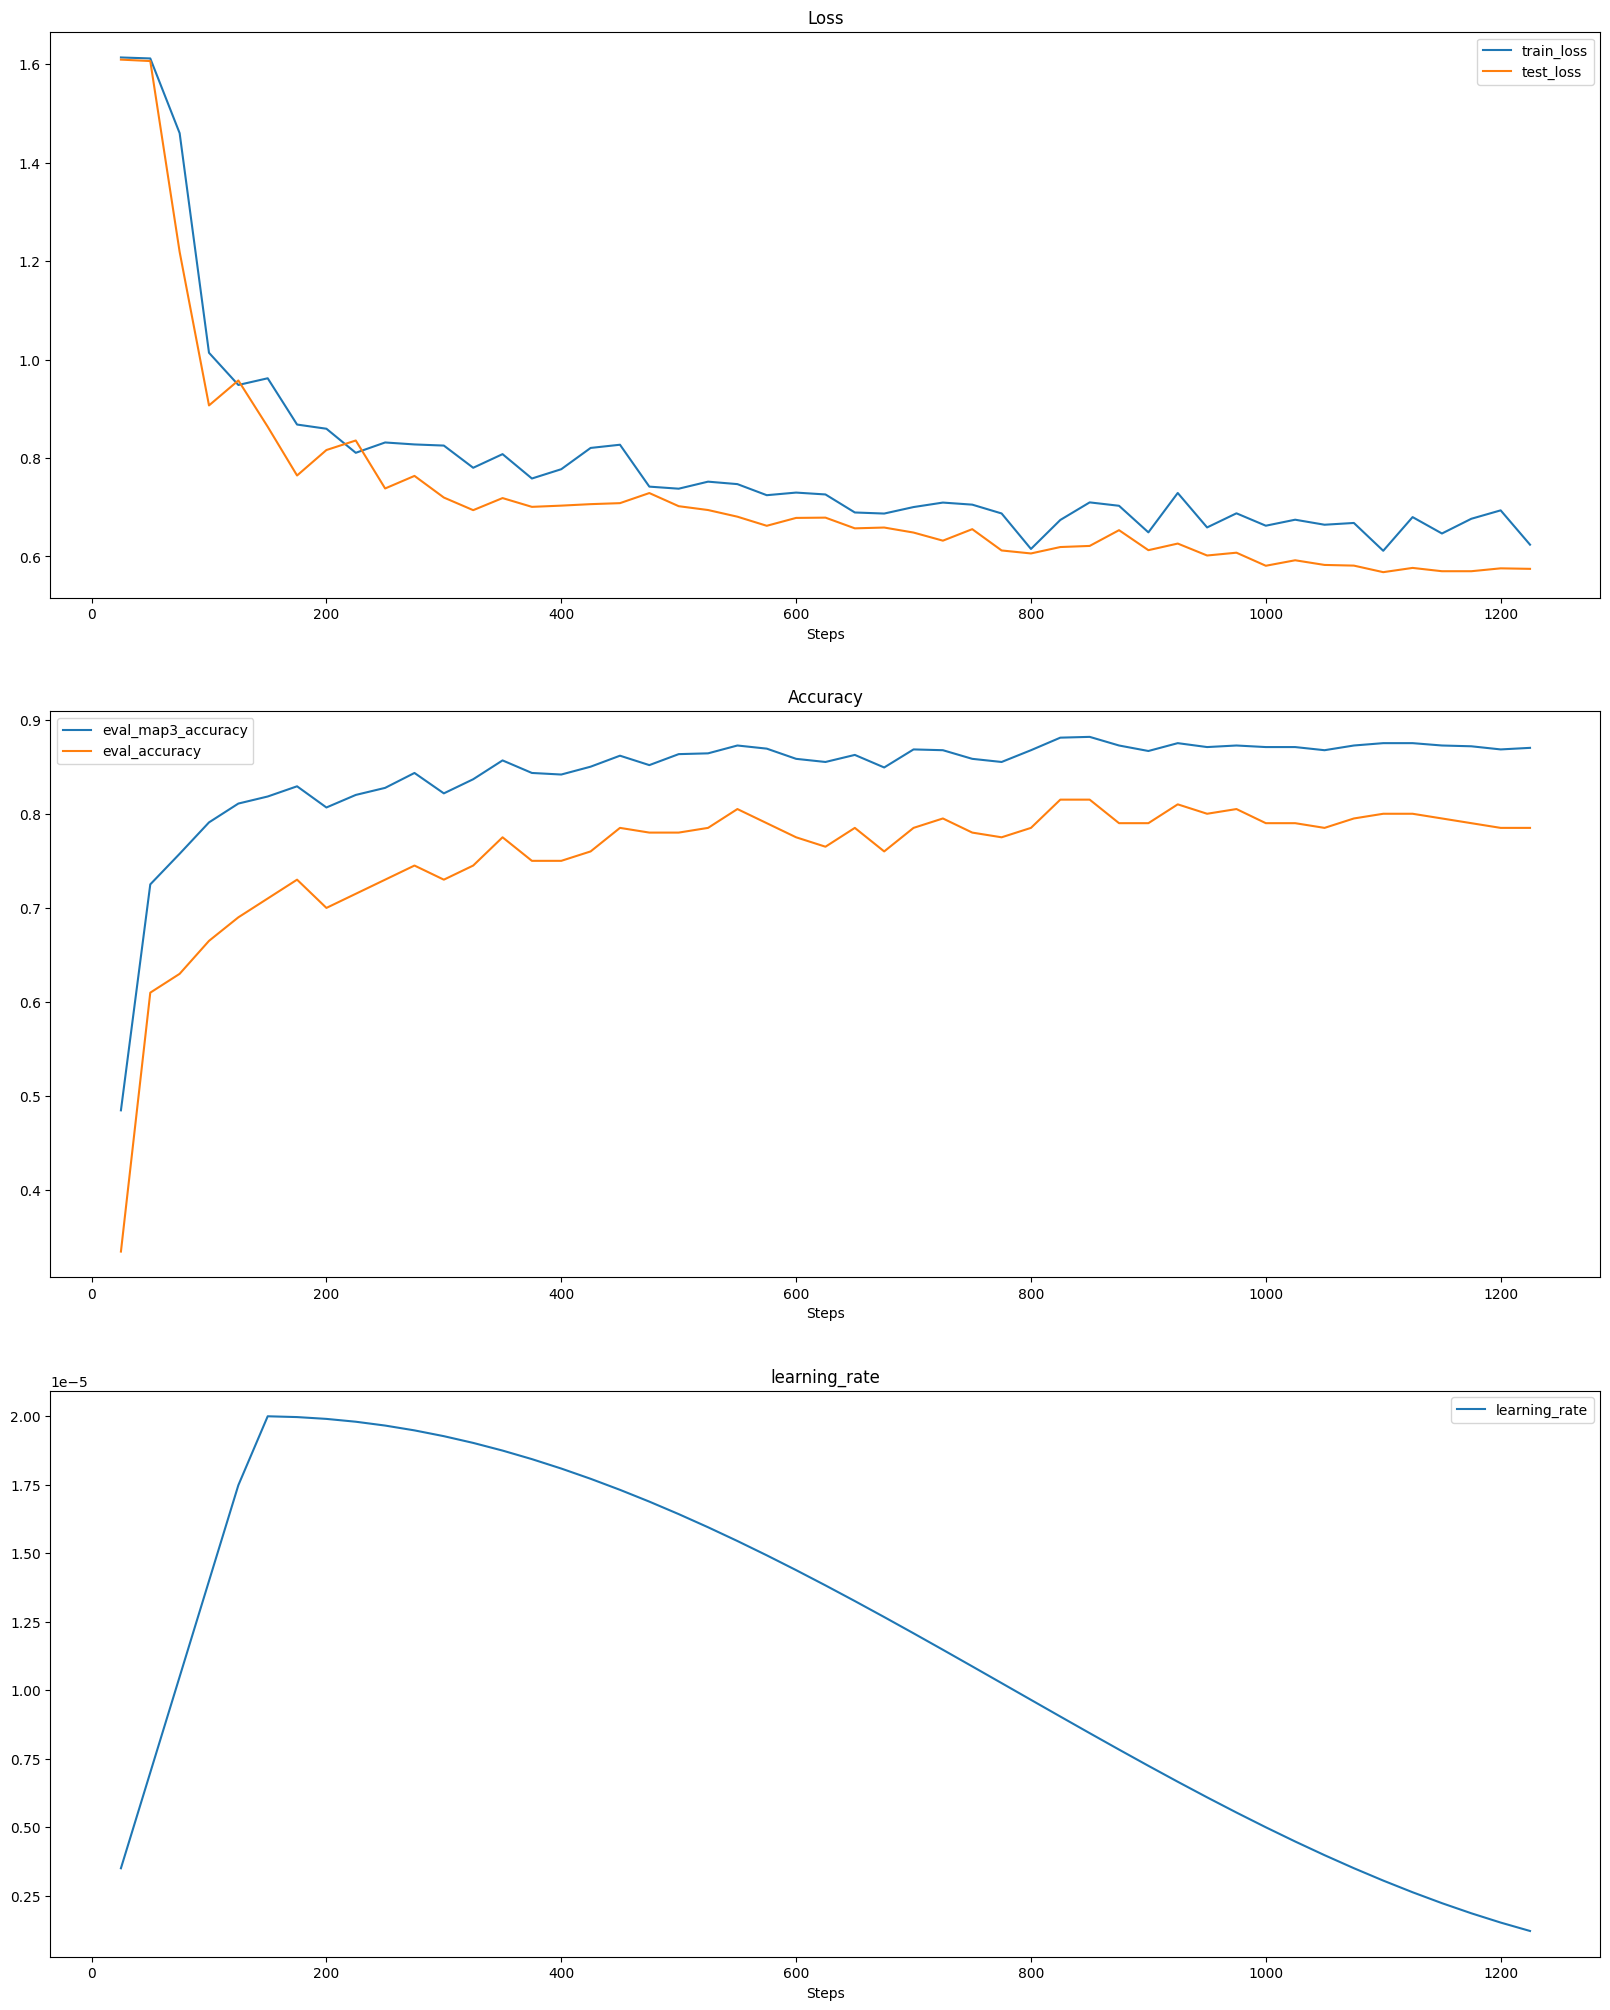

In [13]:
# Train model
import matplotlib.pyplot as pyplot

# plot loss và accuracy
pyplot.figure(figsize=(20,25))
pyplot.subplot(311)
pyplot.title('Loss')
pyplot.plot(steps,train_loss, label='train_loss')
pyplot.plot(steps,eval_loss, label='test_loss')
pyplot.xlabel('Steps')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(312)
pyplot.title('Accuracy')
pyplot.plot(steps,eval_map, label='eval_map3_accuracy')
pyplot.plot(steps,eval_accuracy, label='eval_accuracy')
pyplot.xlabel('Steps')
pyplot.legend()

pyplot.subplot(313)
pyplot.title('learning_rate')
pyplot.plot(steps,learning_rate, label='learning_rate')
pyplot.xlabel('Steps')
pyplot.legend()
pyplot.savefig('History_model.png')
pyplot.show()